<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Big Data II - Armazenamento
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Introdução;</li>
  <li>Orientação a coluna;</li>
  <li>Particionamento.</li>
</ol>

---

# **Exercícios**

## 1\. Particionamento e orientação a coluna.

Replique as atividades da aula 3 em sua conta da AWS.

1.1. Faça o download do arquivo `crime.csv` (fonte [Kaggle](https://www.kaggle.com/yamqwe/chicago-crimee?select=chicago_crime_2014.csv)).

In [1]:
!wget https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/crime.csv -q -O crime.csv

1.2. Leia os dados em um DataFrame Pandas e crie a coluna `reference_date`.

In [2]:
# Solução do item 1.2.
import pandas as pd
from datetime import datetime
from getpass import getpass

df = pd.read_csv('crime.csv')

In [3]:
df.head(2) #Exibindo o dataframe.

,index,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude
0,0,9446824,HX100141,01/01/2014 02:00:00 AM,0000X W ILLINOIS ST,0460,BATTERY,SIMPLE,STREET,False,False,1831,18,42.0,8.0,08B,41.890828,-87.630235
1,1,9446748,HX100020,01/01/2014 12:00:00 AM,006XX N DEARBORN ST,0890,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,1832,18,42.0,8.0,06,41.893542,-87.629702


In [4]:
# verificando os tipos das variáveis:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274423 entries, 0 to 274422
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   index                 274423 non-null  int64  
 1   ID                    274423 non-null  int64  
 2   Case Number           274423 non-null  object 
 3   Date                  274423 non-null  object 
 4   Block                 274423 non-null  object 
 5   IUCR                  274423 non-null  object 
 6   Primary Type          274423 non-null  object 
 7   Description           274423 non-null  object 
 8   Location Description  274247 non-null  object 
 9   Arrest                274423 non-null  bool   
 10  Domestic              274423 non-null  bool   
 11  Beat                  274423 non-null  int64  
 12  District              274423 non-null  int64  
 13  Ward                  274421 non-null  float64
 14  Community Area        274422 non-null  float64
 15  

In [5]:
# Criando a coluna reference_date: 
# df['reference_date'] = df['Date'].str[:11].astype('datetime64')
df['reference_date'] = df['Date'].apply(
 lambda date:
datetime.strptime(date.split(sep=' ')[0], '%m/%d/%Y'). \
strftime('%Y-%m-%d')
)

1.3. Persista o dado no DataFrame em um arquivo csv e em arquivos parquet, estes últimos comprimidos e particionados pela coluna `reference_date`.

In [6]:
# Solução do item 1.3.
# Persistindo o dataframe em csv:
df.to_csv('./crime_csv.csv', sep=',', index=False)

# Persistindo o dataframe em formato parquet:
df.to_parquet('./crime', engine='pyarrow', compression='gzip', partition_cols='reference_date')

1.4. Crie os recursos no AWS S3 e AWS IAM e persista os dados em seus respectivos *buckets*.

In [7]:
# Solução do item 1.4.

# usuário do aws:
aws_access_key_id = getpass()
# chave de segurança:
aws_secret_access_key = getpass()


··········
··········


<li>Instalando o boto3:

In [8]:
!pip install boto3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 132 kB 5.2 MB/s 
     |████████████████████████████████| 79 kB 8.2 MB/s 
     |████████████████████████████████| 10.3 MB 61.4 MB/s 
     |████████████████████████████████| 140 kB 63.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.13 which is incompatible.


In [9]:
import boto3

# criando o cliente para acessar o s3 do aws:

client = boto3.client(
                      's3',
                      aws_access_key_id=aws_access_key_id,
                      aws_secret_access_key=aws_secret_access_key
                      )

In [11]:
import os
BUCKET = 'modulo42-crime'
i = 0
for root, dirs, files in os.walk('./crime'):
 contagem = f'{round(100*i/365, 2)}%'
 print(contagem)
 for file in files:
   path = os.path.join(root, file)
   bucket_path = '/'.join(path.split(sep='/')[2:])
   client.upload_file(path, BUCKET, bucket_path)
 i = i + 1

0.0%
0.27%
0.55%
0.82%
1.1%
1.37%
1.64%
1.92%
2.19%
2.47%
2.74%
3.01%
3.29%
3.56%
3.84%
4.11%
4.38%
4.66%
4.93%
5.21%
5.48%
5.75%
6.03%
6.3%
6.58%
6.85%
7.12%
7.4%
7.67%
7.95%
8.22%
8.49%
8.77%
9.04%
9.32%
9.59%
9.86%
10.14%
10.41%
10.68%
10.96%
11.23%
11.51%
11.78%
12.05%
12.33%
12.6%
12.88%
13.15%
13.42%
13.7%
13.97%
14.25%
14.52%
14.79%
15.07%
15.34%
15.62%
15.89%
16.16%
16.44%
16.71%
16.99%
17.26%
17.53%
17.81%
18.08%
18.36%
18.63%
18.9%
19.18%
19.45%
19.73%
20.0%
20.27%
20.55%
20.82%
21.1%
21.37%
21.64%
21.92%
22.19%
22.47%
22.74%
23.01%
23.29%
23.56%
23.84%
24.11%
24.38%
24.66%
24.93%
25.21%
25.48%
25.75%
26.03%
26.3%
26.58%
26.85%
27.12%
27.4%
27.67%
27.95%
28.22%
28.49%
28.77%
29.04%
29.32%
29.59%
29.86%
30.14%
30.41%
30.68%
30.96%
31.23%
31.51%
31.78%
32.05%
32.33%
32.6%
32.88%
33.15%
33.42%
33.7%
33.97%
34.25%
34.52%
34.79%
35.07%
35.34%
35.62%
35.89%
36.16%
36.44%
36.71%
36.99%
37.26%
37.53%
37.81%
38.08%
38.36%
38.63%
38.9%
39.18%
39.45%
39.73%
40.0%
40.27%
40.55%
40.82%
41

1.5. Crie os recursos no AWS Athena e execute as consultas SQL da aula.

<li>Criando tabelas:

<p><strong>Tabela formato CSV:</strong></p>
<pre><code>
CREATE EXTERNAL TABLE `crime_csv`(
 `index` bigint,
 `id` string,
 `case number` string,
 `date` string,
 `block` string,
 `iucr` string,
 `primary type` string,
 `description` string,
 `location description` string,
 `arrest` string,
 `domestic` string,
 `beat` string,
 `district` string,
 `ward` string,
 `community area` string,
 `fbi code` string,
 `latitude` string,
 `longitude` string,
 `reference_date` string)
ROW FORMAT SERDE
 'org.apache.hadoop.hive.serde2.OpenCSVSerde'
WITH SERDEPROPERTIES (
 'separatorChar' = ',',
 'quoteChar' = '\"',
 'escapeChar' = '\\'
 )
STORED AS INPUTFORMAT
 'org.apache.hadoop.mapred.TextInputFormat'
OUTPUTFORMAT
 'org.apache.hadoop.hive.ql.io.HiveIgnoreKeyTextOutputFormat'
LOCATION
 's3://modulo42-crime-csv/'
TBLPROPERTIES (
 "skip.header.line.count"="1")
</code></pre>
<br>
<p><strong>Tabela formato parquet:</strong></p>
<pre><code>
CREATE EXTERNAL TABLE `crime_parquet`(
 `index` bigint,
 `id` bigint,
 `case number` string,
 `date` string,
 `block` string,
 `iucr` string,
 `primary type` string,
 `description` string,
 `location description` string,
 `arrest` boolean,
 `domestic` boolean,
 `beat` bigint,
 `district` bigint,
 `ward` double,
 `community area` double,
 `fbi code` string,
 `latitude` double,
 `longitude` double)
PARTITIONED BY (
 `reference_date` string)
ROW FORMAT SERDE
 'org.apache.hadoop.hive.ql.io.parquet.serde.ParquetHiveSerDe'
STORED AS INPUTFORMAT
 'org.apache.hadoop.hive.ql.io.parquet.MapredParquetInputFormat'
OUTPUTFORMAT
 'org.apache.hadoop.hive.ql.io.parquet.MapredParquetOutputFormat'
LOCATION
 's3://modulo42-crime/'
</code></pre>

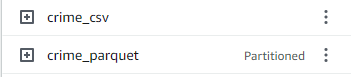

<li>Efeito da orientação a coluna:

query: <code> SELECT "location description", COUNT(1) as "amount"
FROM crime_csv
GROUP BY 1
ORDER BY 2 DESC;</code>

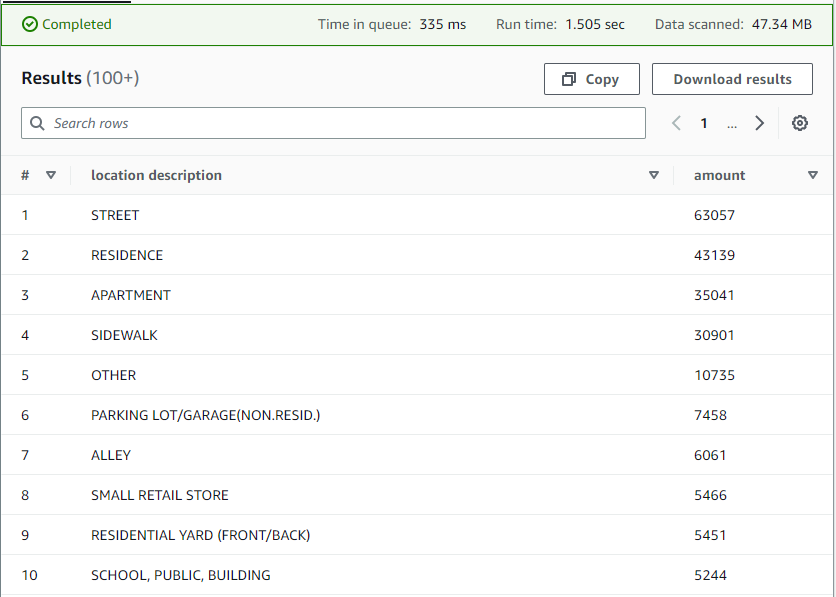

query: <code>>SELECT "location description", COUNT(1) as "amount"
FROM crime_parquet
GROUP BY 1
ORDER BY 2 DESC;</code>

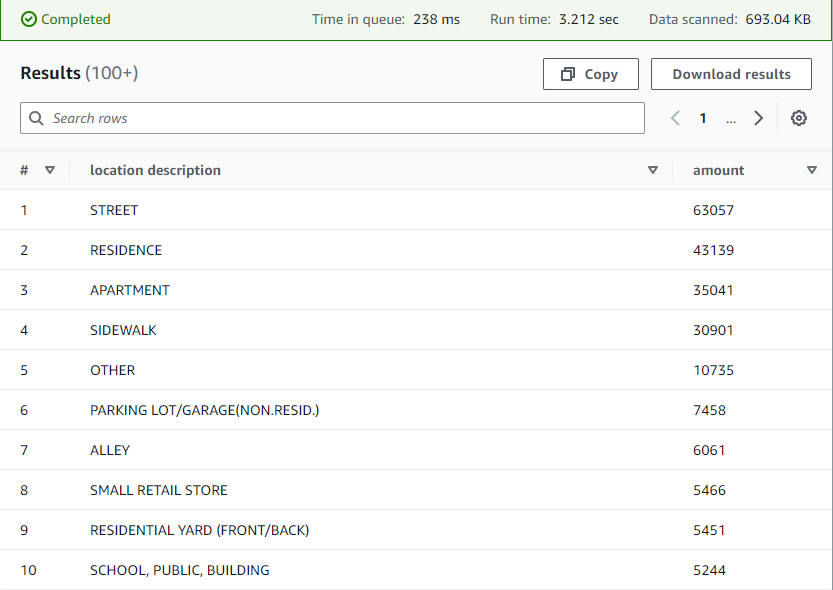

A diferença no tamanho da consulta é e quase 108 vezes maior.


---



<li>Efeito do particionamento:

query: <code>SELECT *
FROM crime_csv
WHERE CAST(reference_date as DATE) BETWEEN DATE '2014-12-01' and
DATE '2014-12-31'</code>

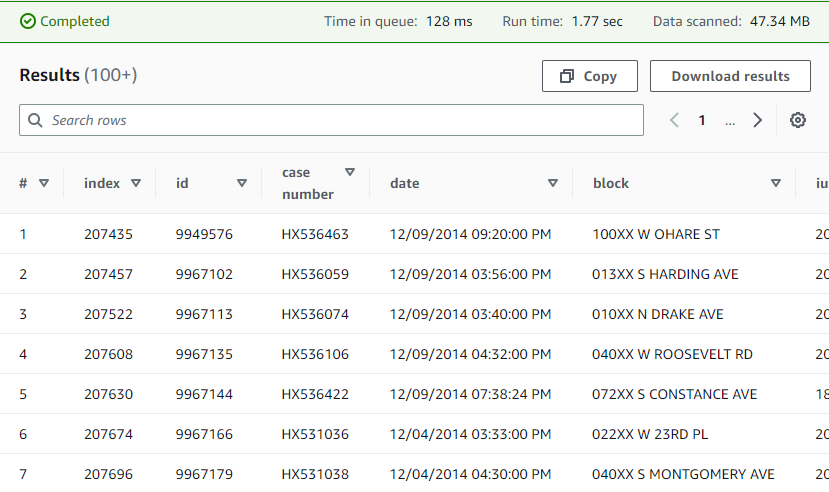

query: <code>SELECT *
FROM crime_parquet
WHERE CAST(reference_date as DATE) BETWEEN DATE '2014-12-01' and
DATE '2014-12-31'</code>

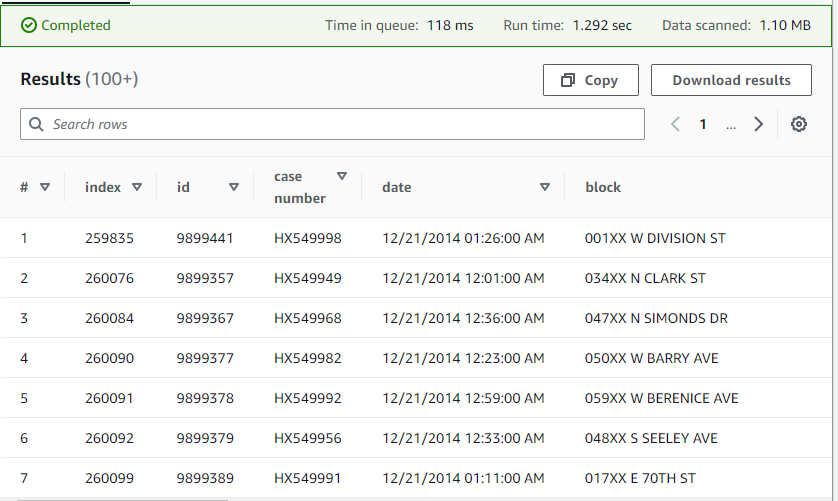

A diferença na consulta é de 47 vezes.


---



<li>Efeito da orientação a coluna e do particionamento:

quey:<code>SELECT "location description", COUNT(1) as "amount"
FROM crime_csv
WHERE CAST(reference_date as DATE) BETWEEN DATE '2014-12-01' and
DATE '2014-12-31'
GROUP BY 1
ORDER BY 2 DESC</code>



1.   Item da lista
2.   Item da lista

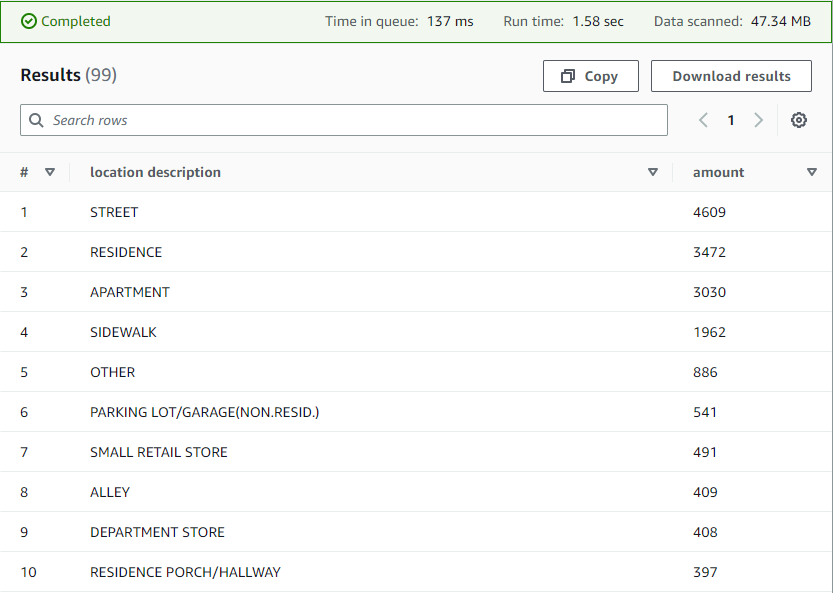

query: <code>SELECT "location description", COUNT(1) as "amount"
FROM crime_parquet
WHERE CAST(reference_date as DATE) BETWEEN DATE '2014-12-01' and
DATE '2014-12-31'
GROUP BY 1
ORDER BY 2 DESC</code>

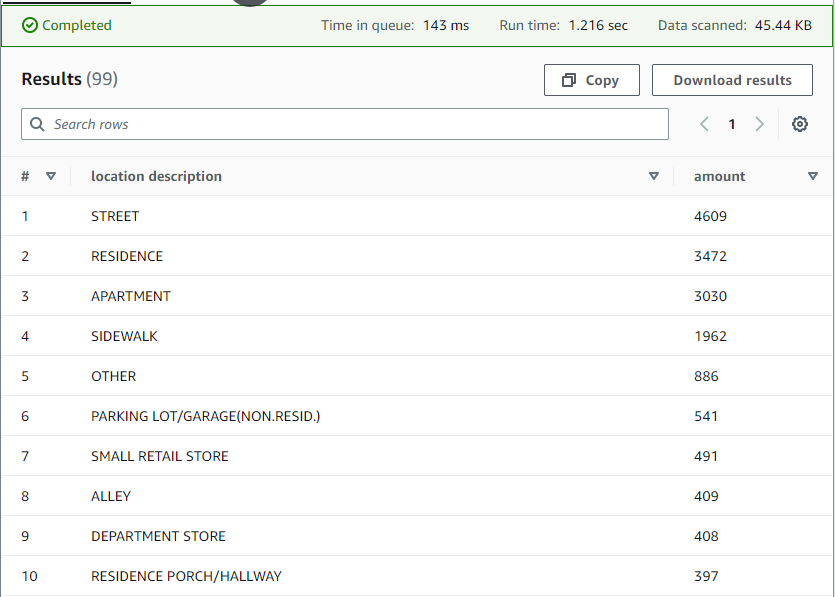

Se considerar o consumo da consulta parquet como 0,05Mb, a sua diferença em relação ao formato CSV é de quase 950 vezes.